In [1]:
!mkdir -p /root/.kaggle

In [3]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [4]:
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# #!/bin/bash
# !curl -L -o bank-marketing.zip https://www.kaggle.com/api/v1/datasets/download/henriqueyamahata/bank-marketing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  393k  100  393k    0     0   465k      0 --:--:-- --:--:-- --:--:-- 2286k


In [6]:
!kaggle datasets download -d henriqueyamahata/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
  0% 0.00/393k [00:00<?, ?B/s]
100% 393k/393k [00:00<00:00, 767MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('/content/bank-marketing.zip', 'r') as zip_ref:
  zip_ref.extractall

In [8]:
!unzip bank-marketing.zip

Archive:  bank-marketing.zip
  inflating: bank-additional-full.csv  
  inflating: bank-additional-names.txt  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: xlabel='duration'>

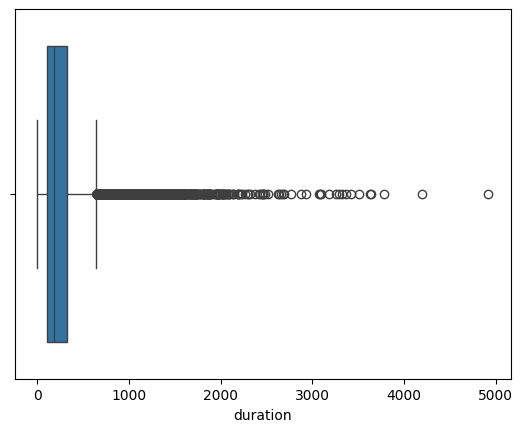

In [ ]:
sns.boxplot(x='duration', data=df)

In [ ]:
Q1=df['duration'].quantile(0.25)
Q3=df['duration'].quantile(0.75)
IQR=Q3-Q1
print('Q1 is: ',Q1)
print('Q3 is: ',Q3)
print('IQR is: ',IQR)
Lower = Q1 - IQR
Upper = Q3 + IQR
print('Lower is: ',Lower, 'Upper is: ',Upper)

Q1 is:  102.0
Q3 is:  319.0
IQR is:  217.0
Lower is:  -115.0 Upper is:  536.0


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.sort_values('y')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25286,48,technician,married,university.degree,no,no,no,cellular,nov,tue,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
25287,32,admin.,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
25288,31,technician,single,university.degree,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
25289,34,services,single,high.school,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37027,26,services,single,high.school,no,no,no,cellular,jul,tue,...,2,999,0,nonexistent,-2.9,92.469,-33.6,1.044,5076.2,yes
37026,23,student,single,high.school,no,yes,no,cellular,jul,tue,...,2,13,1,success,-2.9,92.469,-33.6,1.044,5076.2,yes
2257,39,blue-collar,married,basic.9y,unknown,no,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,yes
30138,60,retired,divorced,professional.course,no,yes,no,cellular,apr,thu,...,1,5,2,failure,-1.8,93.075,-47.1,1.365,5099.1,yes


In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [ ]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
  print(feature, np.round(df[feature].isnull().mean(), 4),  '% missing values')
else:
  print('No missing value found')

No missing value found


In [ ]:
for column in df.columns:
  print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
for feature in categorical_features:
    print(f'The feature is {feature} and number of categories are {len(df[feature].unique())}')

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3


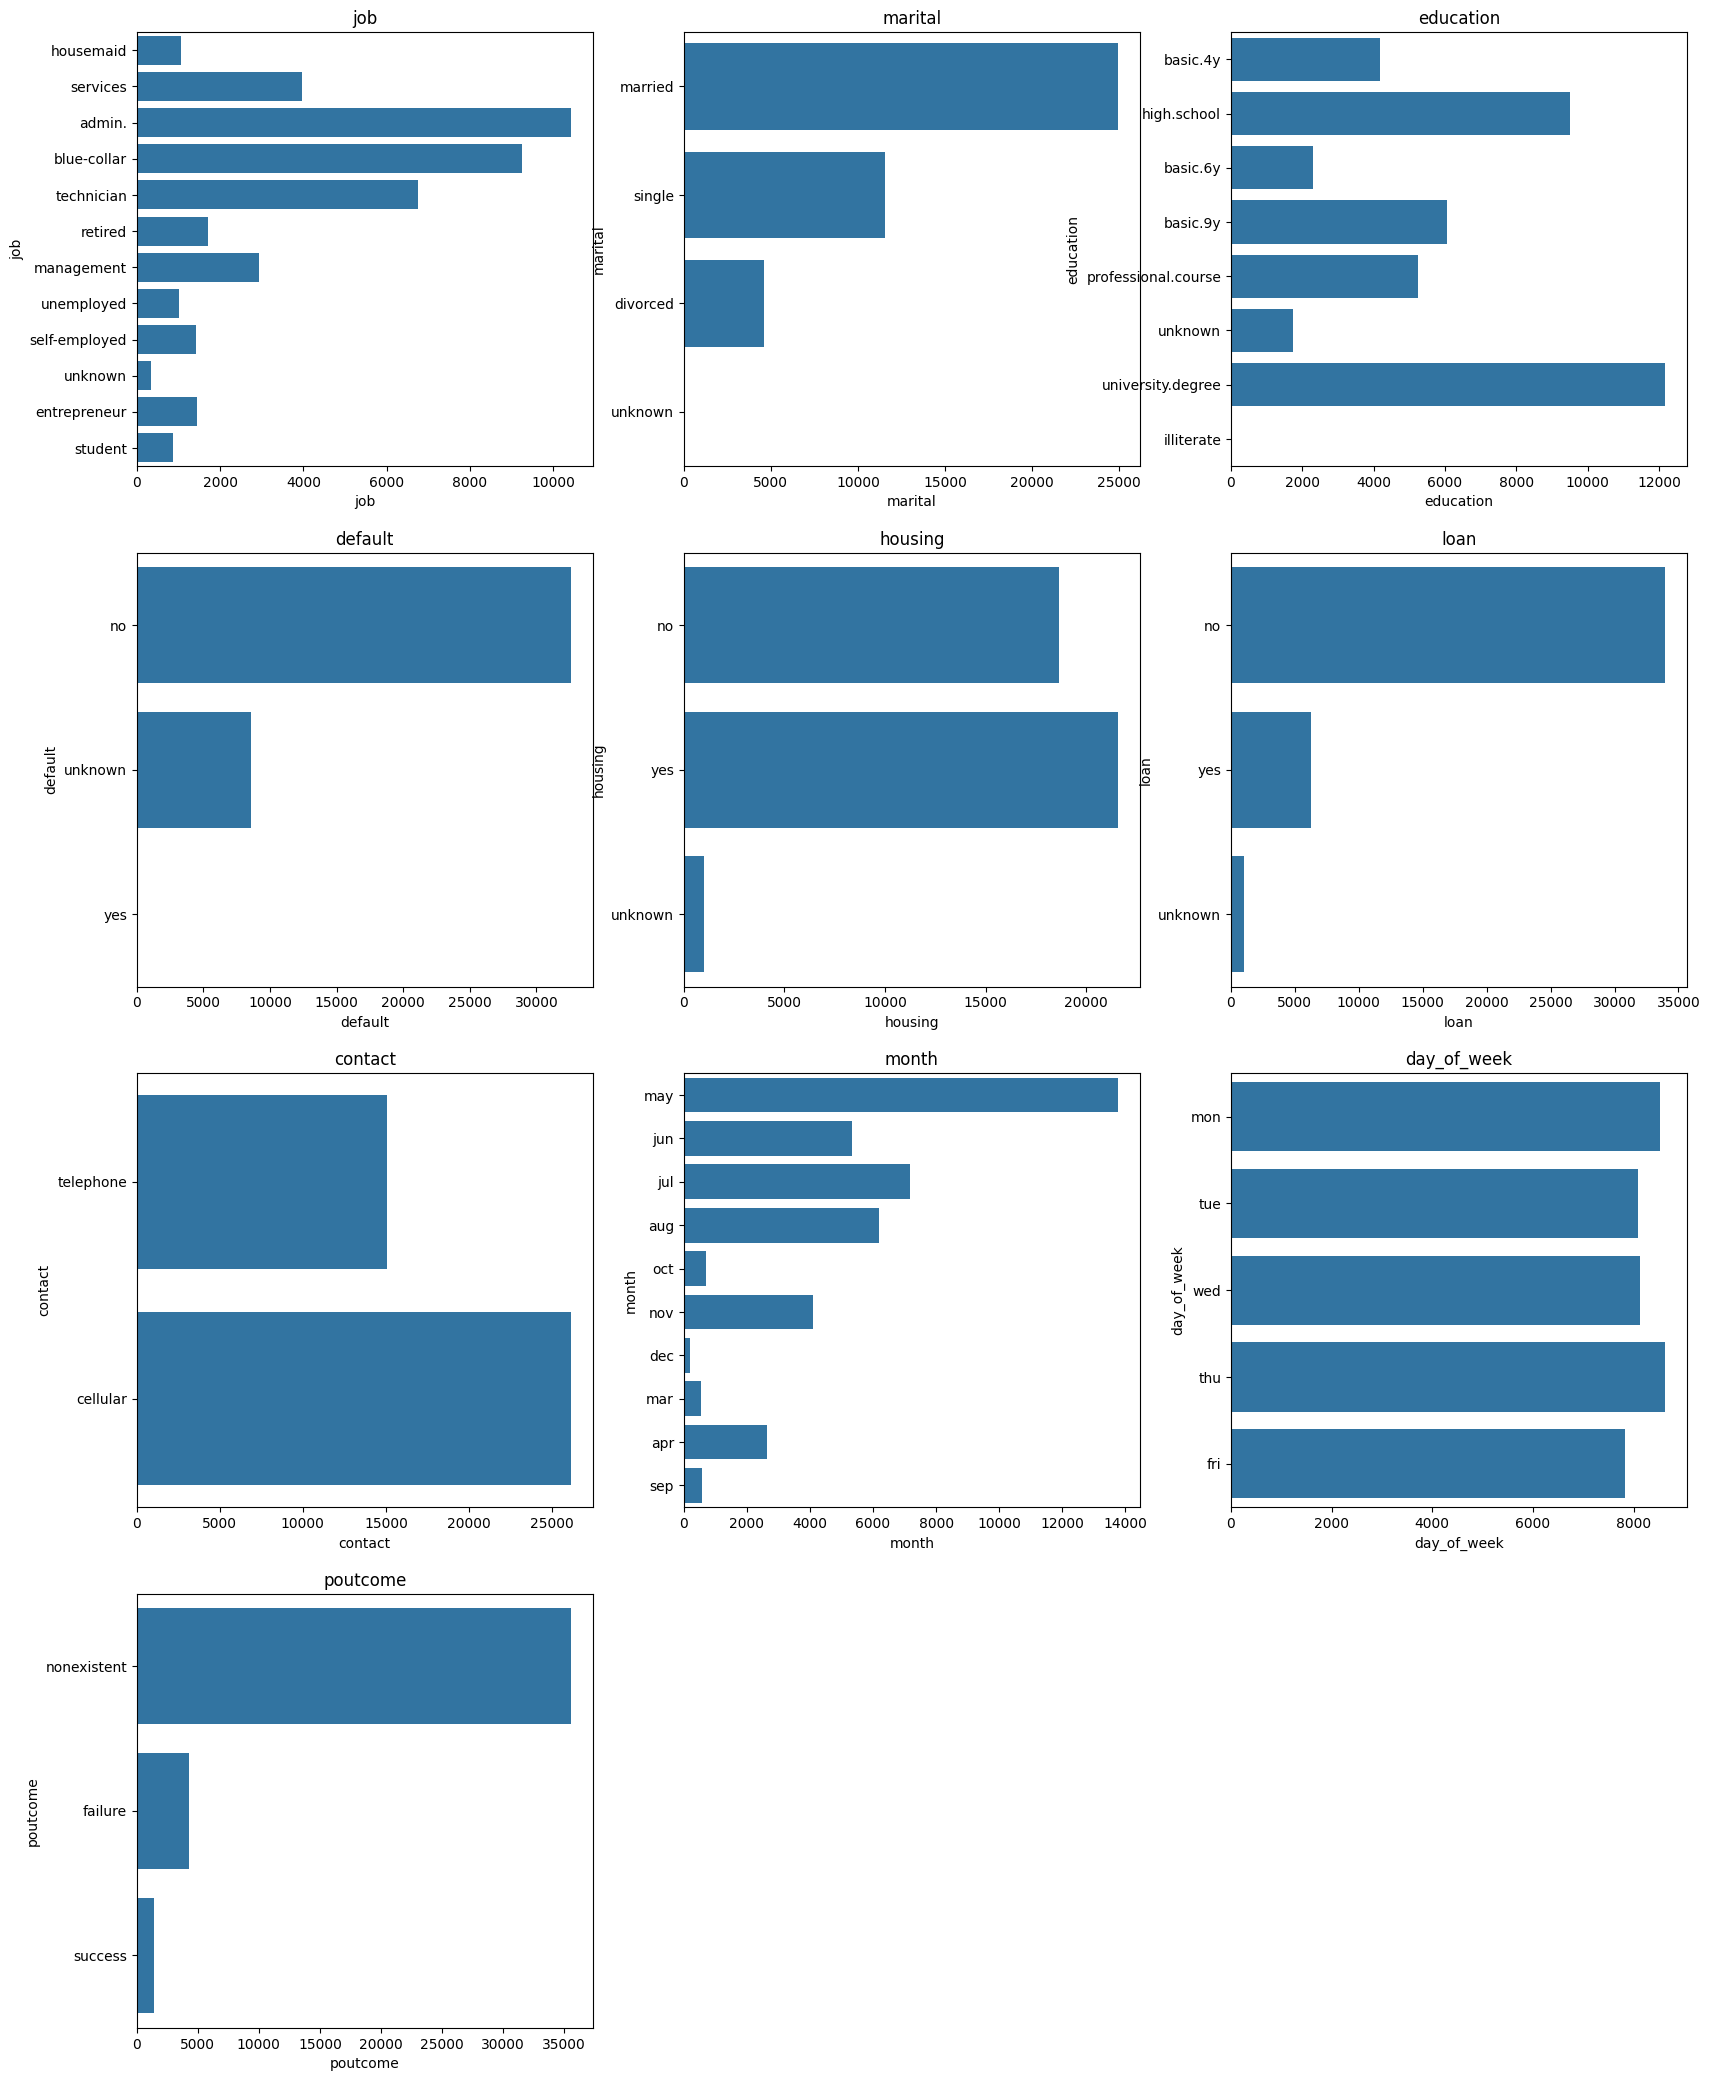

In [ ]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=df)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1
plt.show()

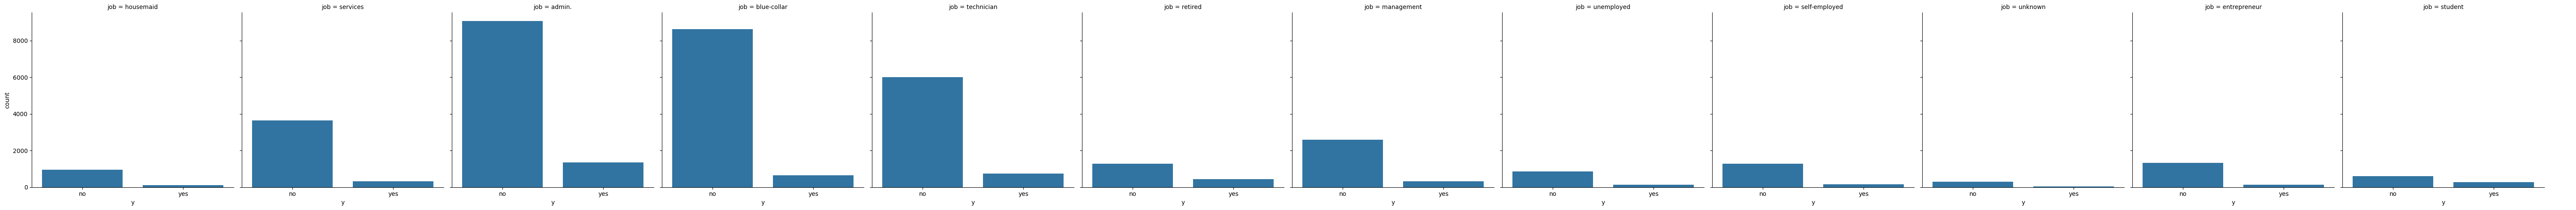

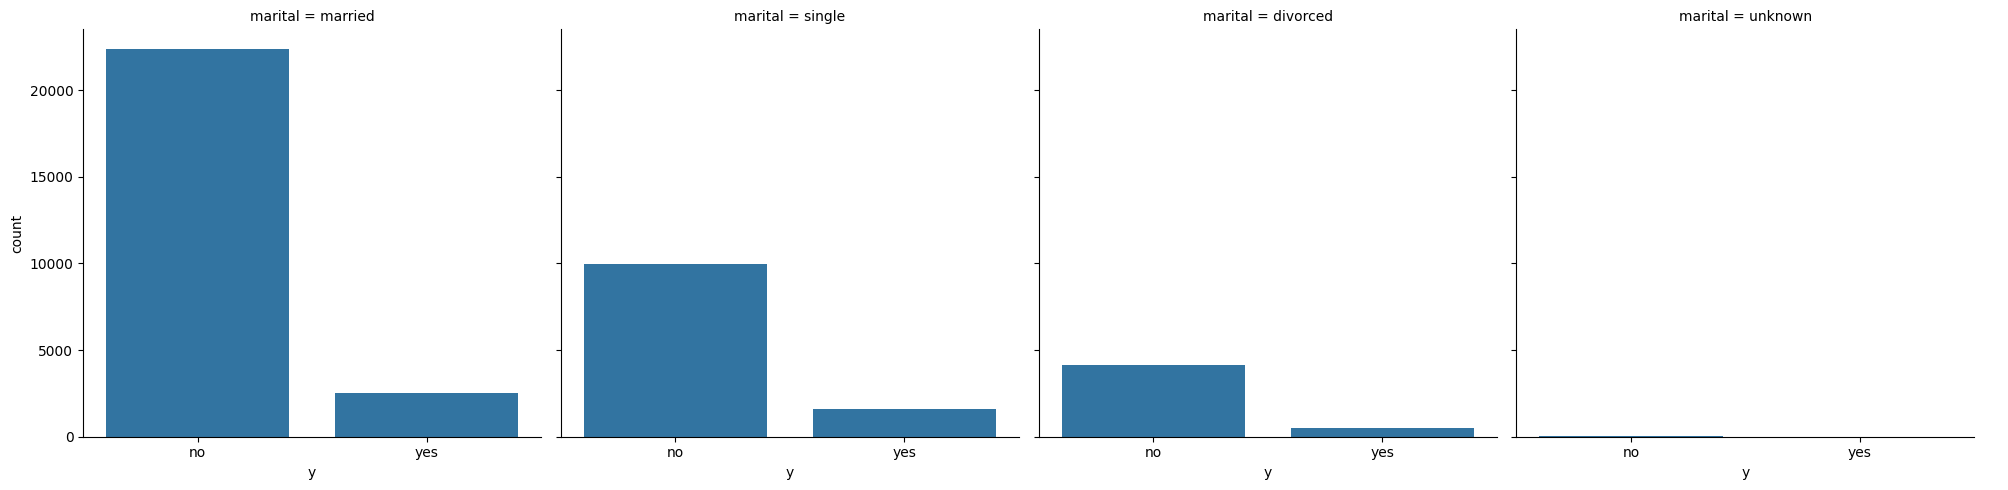

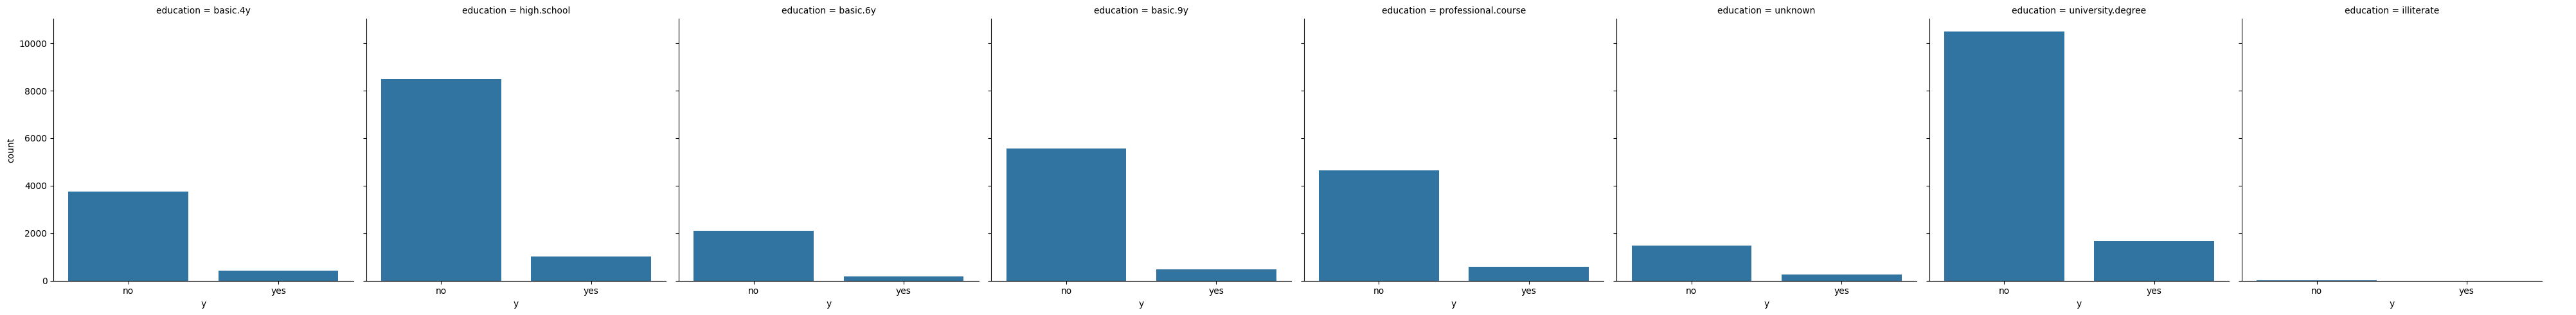

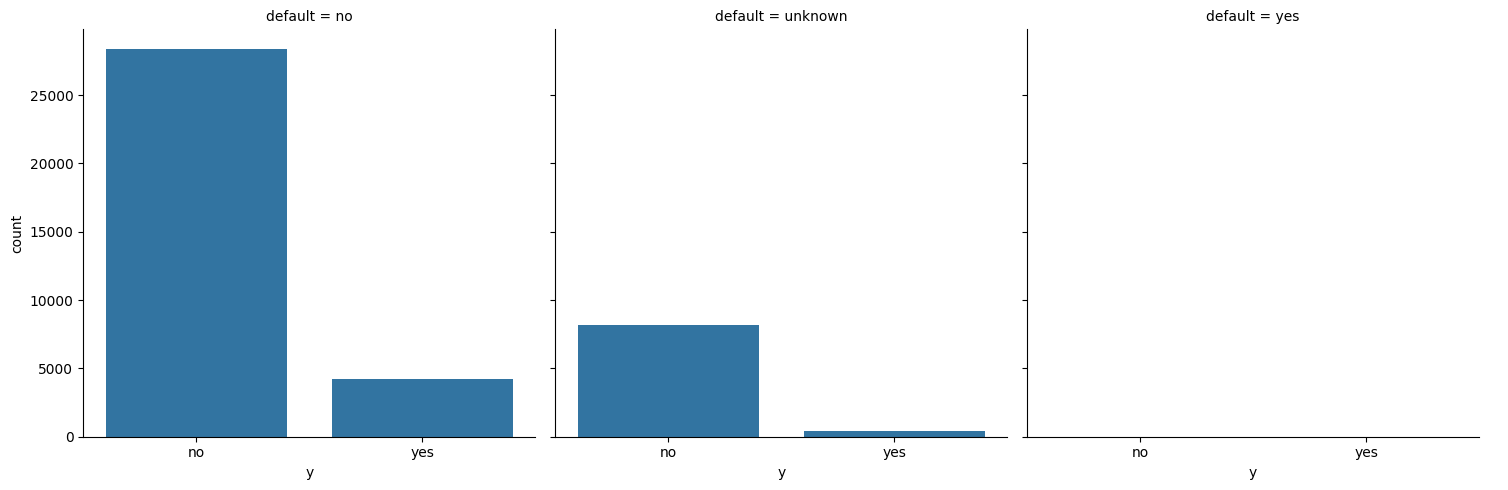

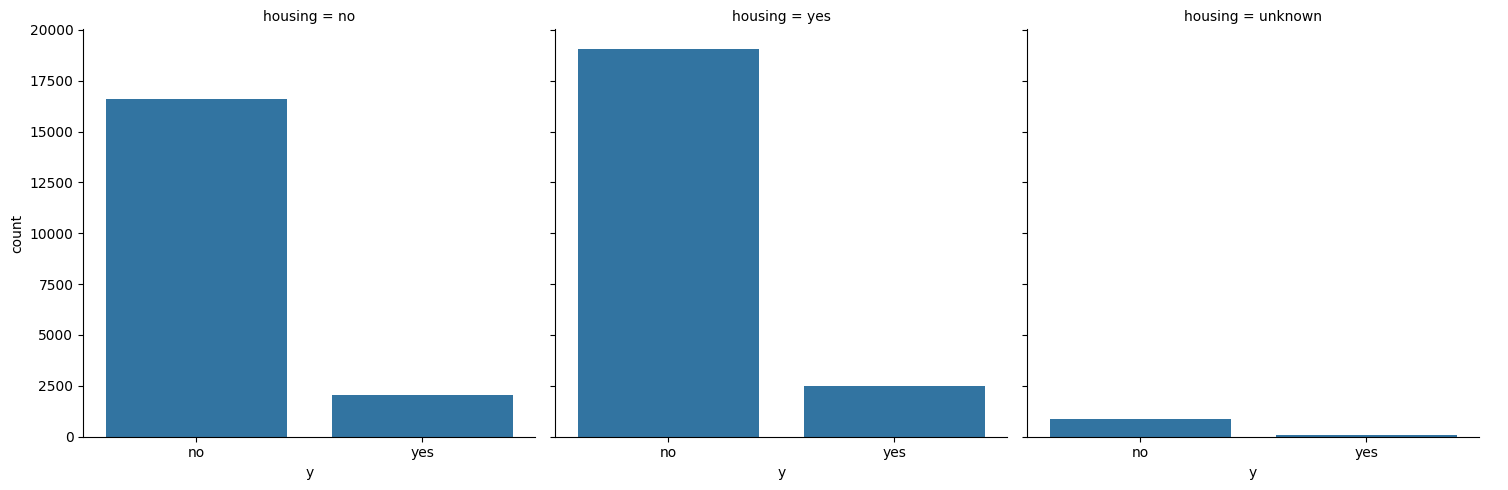

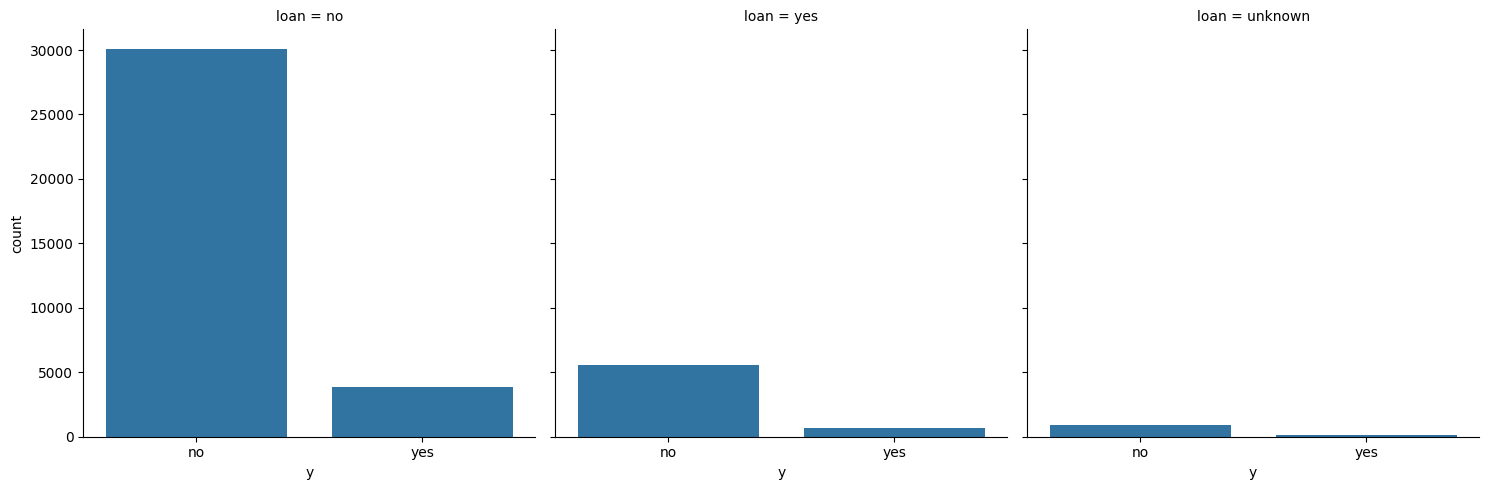

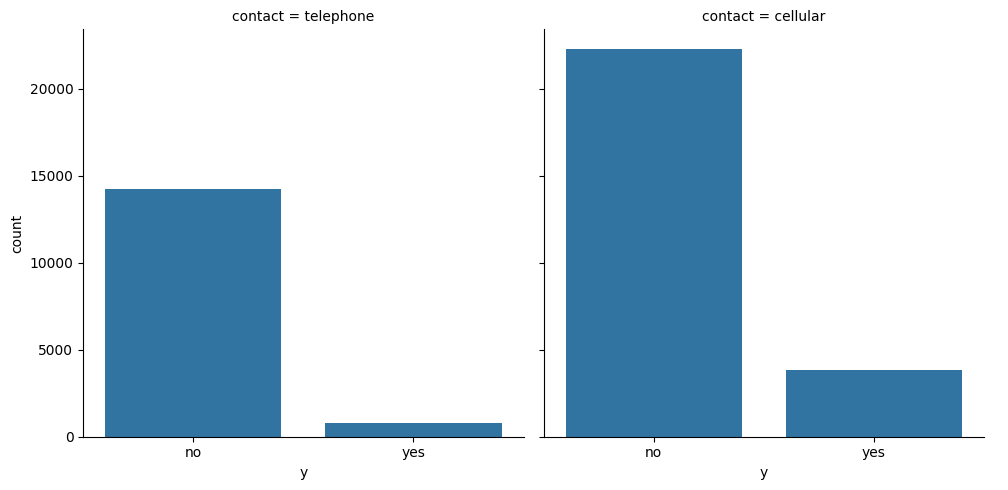

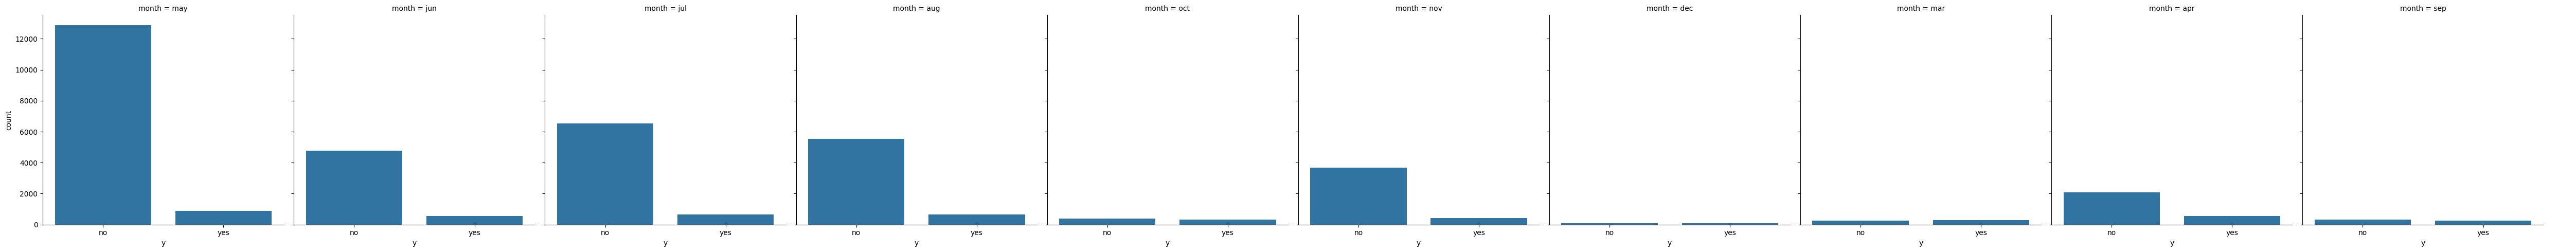

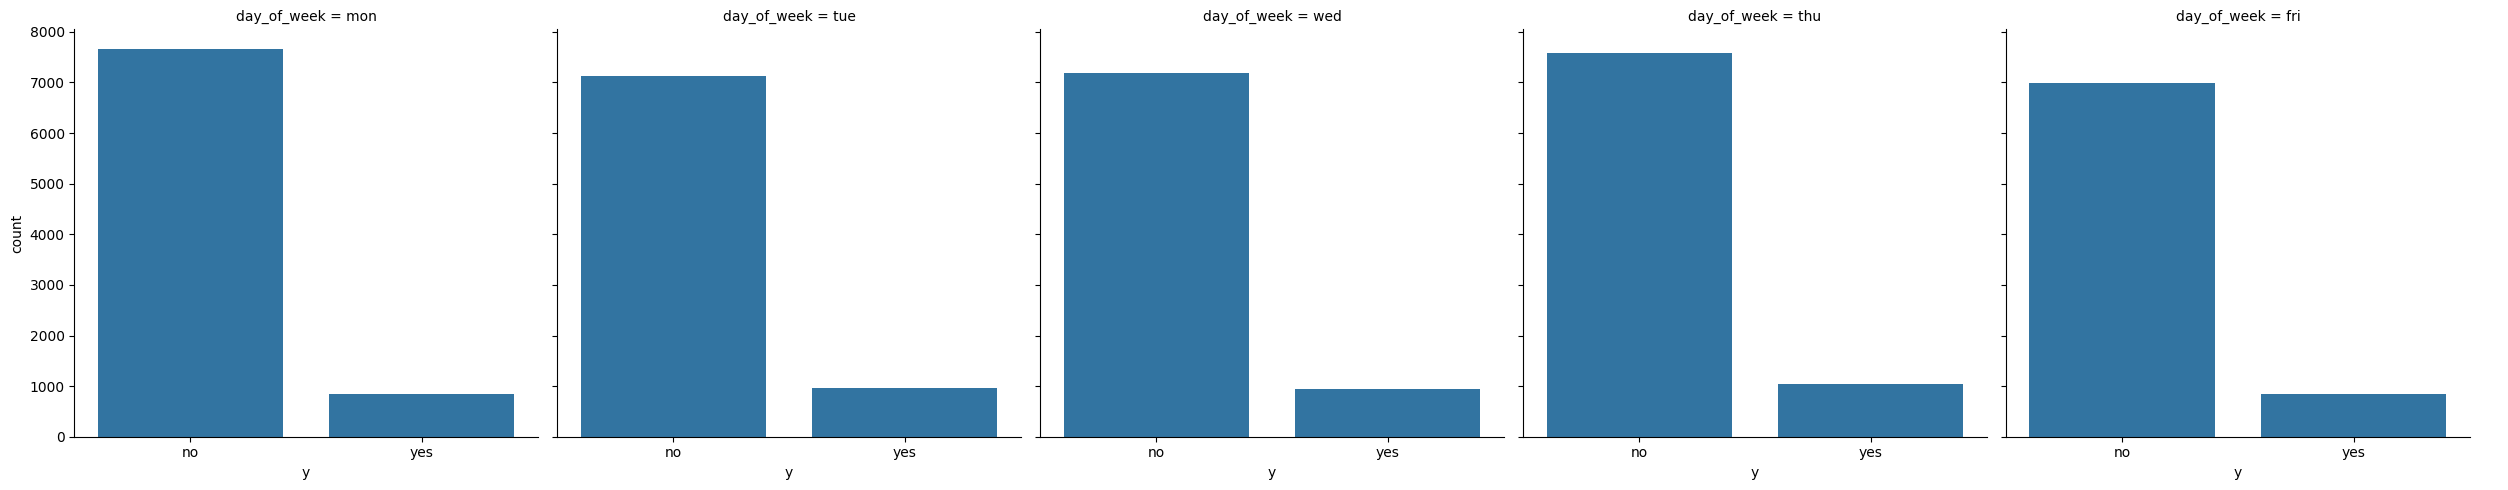

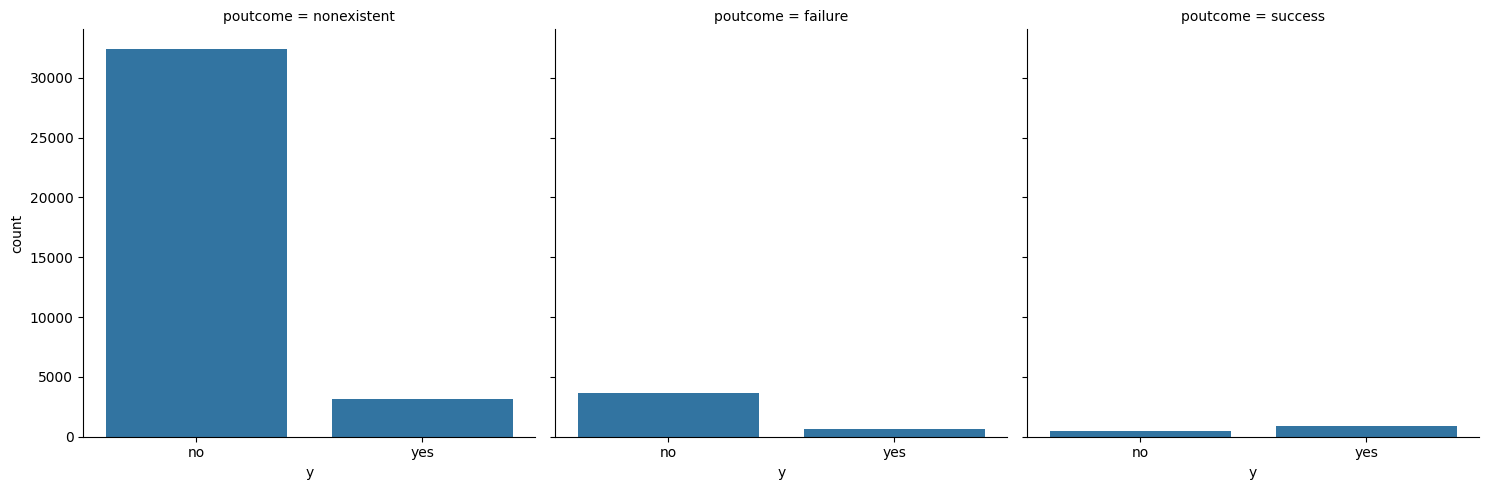

In [ ]:
for categorical_feature in categorical_features:
  sns.catplot(x='y', col=categorical_feature, kind='count', data=df)
plt.show()

In [ ]:
for categorical_feature in categorical_features:
  print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [ ]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [ ]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != '0') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  20


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print(f'Discrete Variables Count: {len(discrete_feature)}')

Discrete Variables Count: 13


In [ ]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print(f'Continuous feature Count: {len(continuous_features)}')

Continuous feature Count: 7


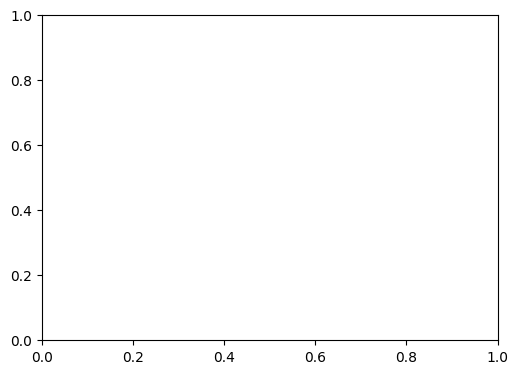

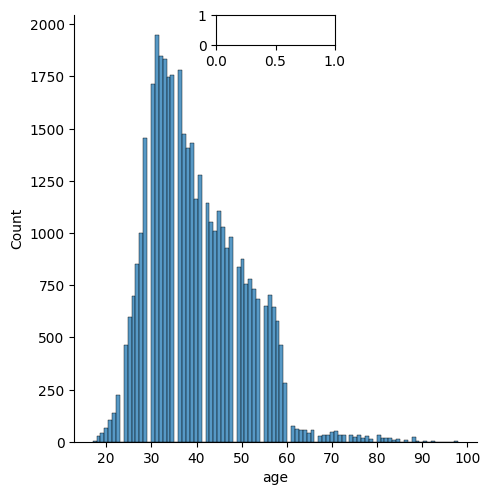

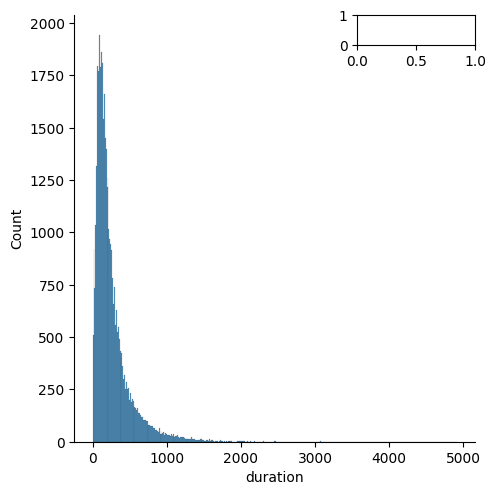

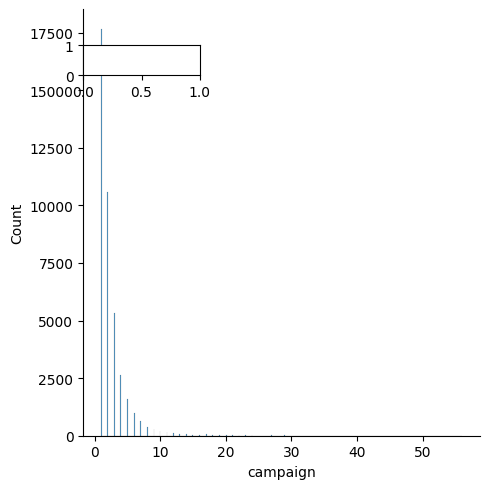

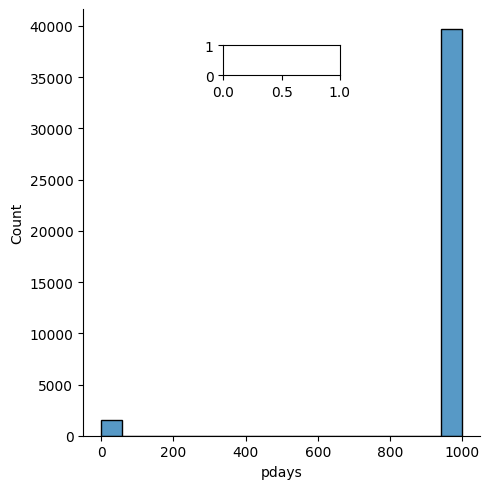

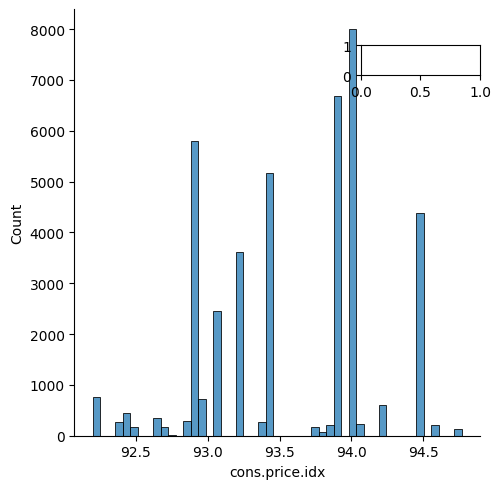

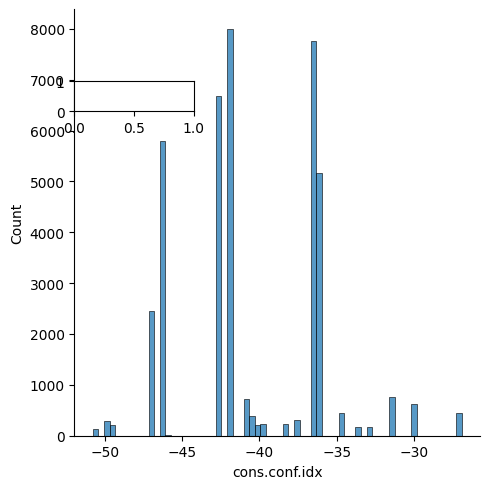

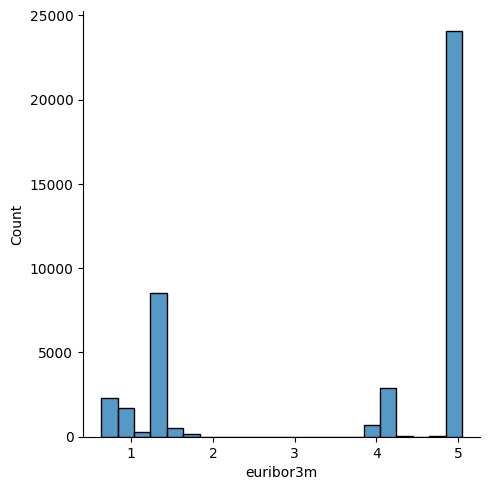

In [ ]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.displot(df[continuous_feature])
  plt.xlabel(continuous_feature)
  plotnumber+=1
plt.show()

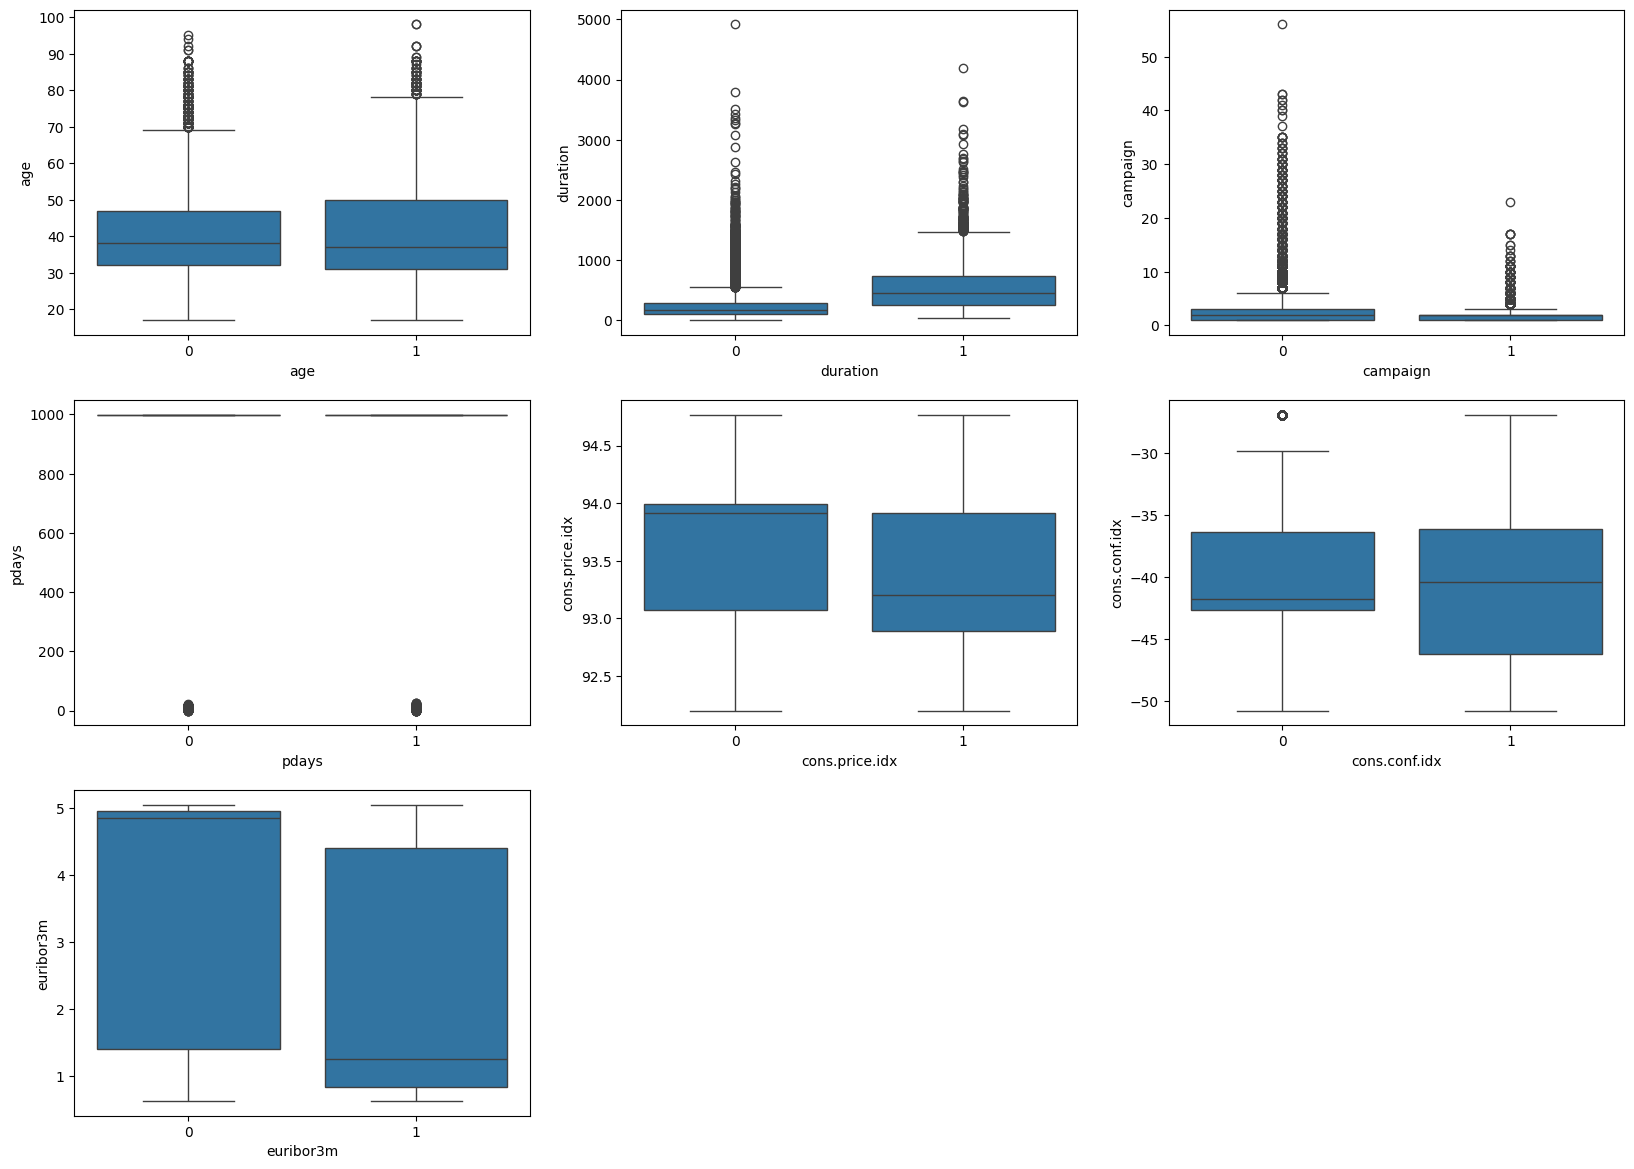

In [ ]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(x='y', y= df[feature], data=df)
  plt.xlabel(feature)
  plotnumber+=1
plt.show()

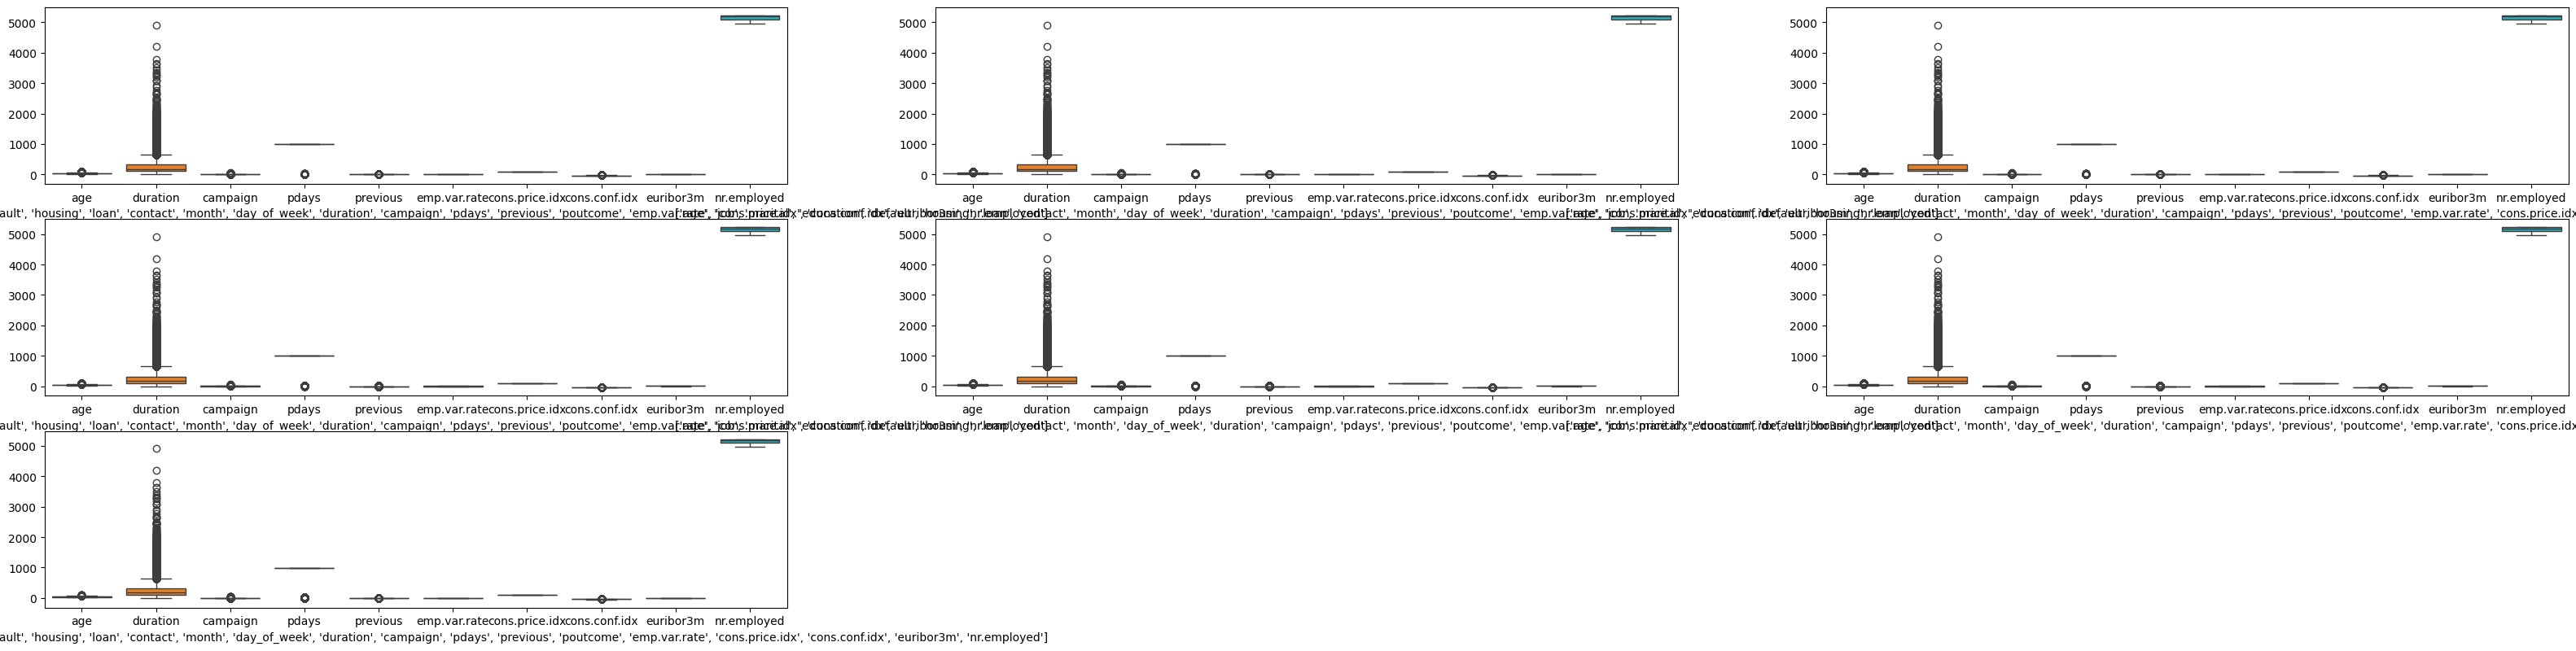

In [ ]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(40,40), facecolor='white')
plotnumber =1
for feature in continuous_features:
  ax = plt.subplot(12,3,plotnumber)
  sns.boxplot(df[numerical_features])
  plt.xlabel(numerical_features)
  plotnumber+=1
plt.show()

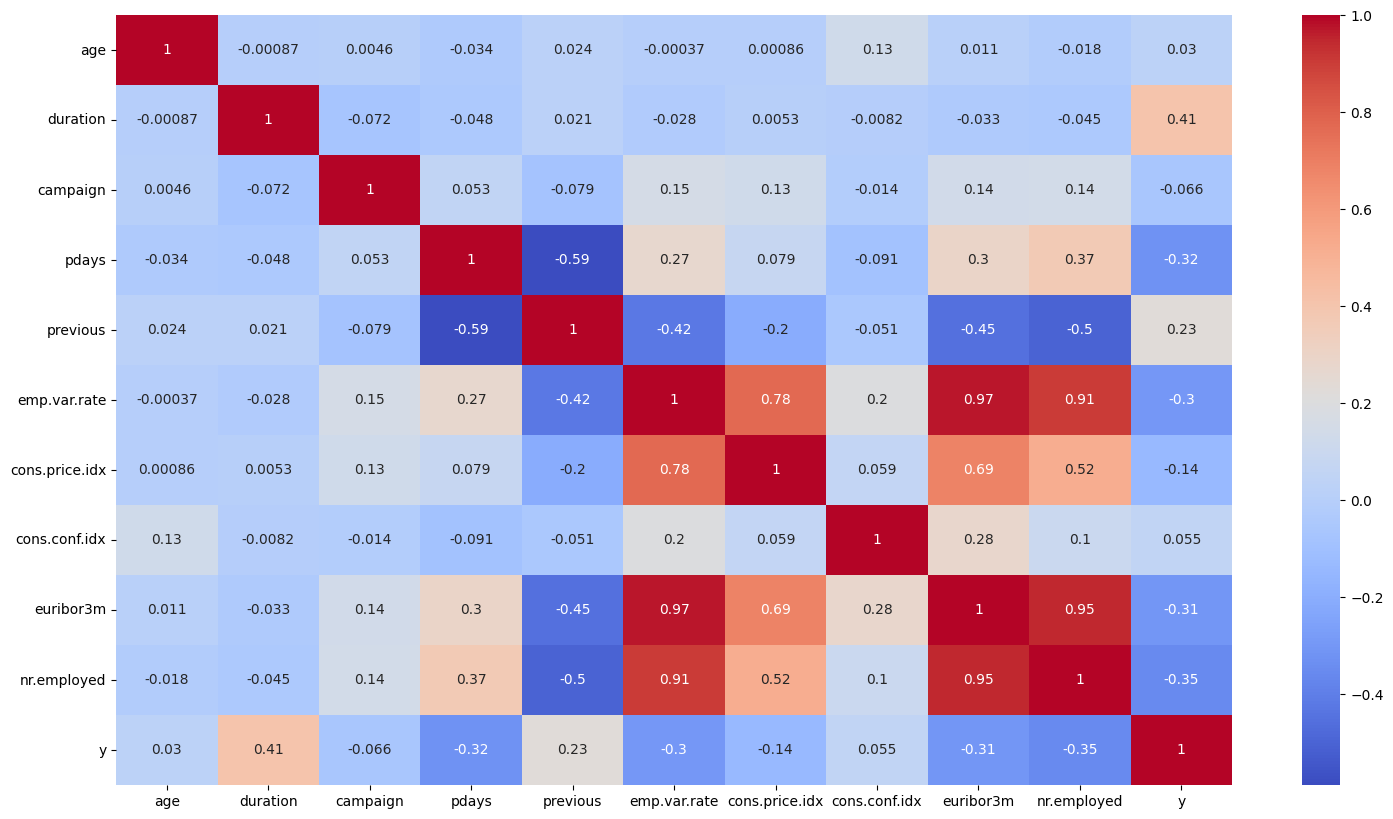

In [ ]:
plt.figure(figsize=(18, 10))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

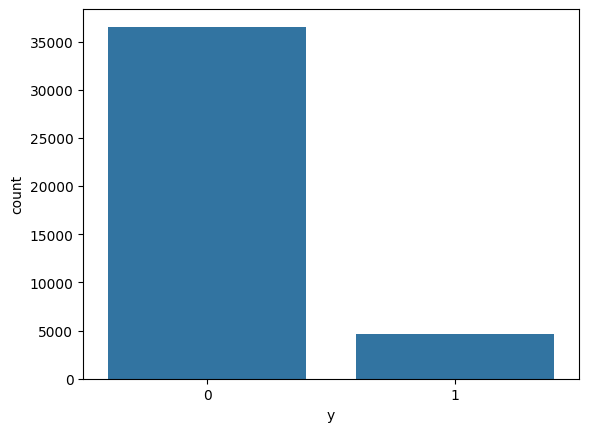

In [ ]:
sns.countplot(x='y',data=df)
plt.show()

In [ ]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [ ]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder= 'passthrough')

full_pipeline=Pipeline([
    ('preprocessing', transformer),
    ('estimator', rfc)

])

In [ ]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [ ]:
full_pipeline.score(X_train, y_train)

1.0

In [ ]:
full_pipeline.score(X_test, y_test)

0.9102937606215101

In [ ]:
X_train_transformed_df = pd.DataFrame(data = transformer.fit_transform(X_train), columns = transformer.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(data = transformer.transform(X_test), columns = transformer.get_feature_names_out())

In [ ]:
X_train_transformed_df

,num__age,num__duration,num__campaign,num__pdays,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,...,cat__month_oct,cat__month_sep,cat__day_of_week_fri,cat__day_of_week_mon,cat__day_of_week_thu,cat__day_of_week_tue,cat__day_of_week_wed,cat__poutcome_failure,cat__poutcome_nonexistent,cat__poutcome_success
0,-0.001669,-0.631114,-0.206242,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771354,0.843165,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.864095,-0.546321,0.513676,0.194661,-0.350902,-1.199440,-1.180760,-1.229916,-1.372028,-0.939748,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.819007,-0.943306,1.233593,0.194661,1.677559,-1.199440,-1.180760,-1.229916,-1.308581,-0.939748,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.285806,-0.631114,0.873635,0.194661,-0.350902,0.838794,0.589080,-0.472769,0.771930,0.843165,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.097494,0.332441,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.713674,0.330405,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,1.723182,0.652341,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.711943,0.330405,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32946,-0.289144,0.116604,-0.566200,0.194661,-0.350902,0.838794,1.533570,-0.278074,0.771930,0.843165,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
32947,-0.480795,-0.245692,-0.566200,-5.147753,1.677559,-2.218556,-1.978483,2.945212,-1.654659,-2.067543,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
32948,-0.001669,0.143584,-0.206242,0.194661,-0.350902,0.647709,0.720307,0.890097,0.711367,0.330405,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
